# CODE (Lecture 7) - 30 November / 2021 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
from sympy import Matrix
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'



### Integrators

In [6]:
def rk4s(f,h,x,**kwargs): # RK4 single iteration
    k1 = h*f(x,**kwargs)
    k2 = h*f(x+0.5*k1,**kwargs)
    k3 = h*f(x+0.5*k2,**kwargs)
    k4 = h*f(x+k3,**kwargs)
    x += (k1+2*k2+2*k3+k4)/6
    return x 

def rk4(f,y0,t,**kwargs): # # RK4 timeline
    n = len(t)
    m = len(y0)
    y = np.zeros((n,m))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f(y[i], t[i], **kwargs)
        k2 = h * f(y[i] + 0.5 * k1, t[i] + 0.5 * h, **kwargs)
        k3 = h * f(y[i] + 0.5 * k2, t[i] + 0.5 * h, **kwargs)
        k4 = h * f(y[i] + k3, t[i+1], **kwargs)
        y[i+1] = y[i] + (k1 + 2.0 * ( k2 + k3 ) + k4)/6.0
    return y

### Plotter 2D

In [7]:
def plotSpace2D(ax, f, lims=(-1,1,-1,1), kx=11, ky=11, steps=1, h=0.05, bound=1e4,
                arrows=0, arrW=0.2, lw=1, alpha=1, showinits=True, report=True, **kwargs):
    if report: print('Plotting', kx*ky*steps, 'segments')
    points = []
    for x in np.linspace(lims[0],lims[1],num=kx, endpoint=True):
        for y in np.linspace(lims[2],lims[3],num=ky, endpoint=True):
            points.append((x,y))      
    plt.xlim(lims[0],lims[1]) 
    plt.ylim(lims[2],lims[3])
    for (x,y) in points:
        X1 = [x,y]
        if showinits: ax.plot(x,y, marker ='.', c='k', alpha=0.2)
        for it in range(steps):
            X2 = rk4s(f,h,X1,**kwargs)
            if any(X2>bound) or any(X2<-bound): break
            if arrows and not it%arrows and it:
                ax.arrow(X1[0],X1[1], X2[0]-X1[0], X2[1]-X1[1], fc='k',
                          width=0, length_includes_head=True, head_width=arrW*arrows)
            else: ax.plot([X1[0],X2[0]],[X1[1],X2[1]], 'k', lw=lw, alpha=alpha)
            X1[:] = X2[:]

### Matrix

In [4]:
def info(X):
    print(X)
    EIG = np.linalg.eig(X)
    print('Eigen Values :',EIG[0])
    for eigvec in EIG[1]: print('Eigen Vector :',eigvec)
    print('Det :', np.linalg.det(X),'| Trace :', np.trace(X))

### Synchronization of coupled linear systems


In [5]:
def coupled_linear_systems(y, t=0, a=0, alph=0):               
    dy = np.zeros_like(y)
    dy[0] = a*y[0] + alph*(y[1] - y[0])             
    dy[1] = a*y[1] + alph*(y[0] - y[1])       
    return dy

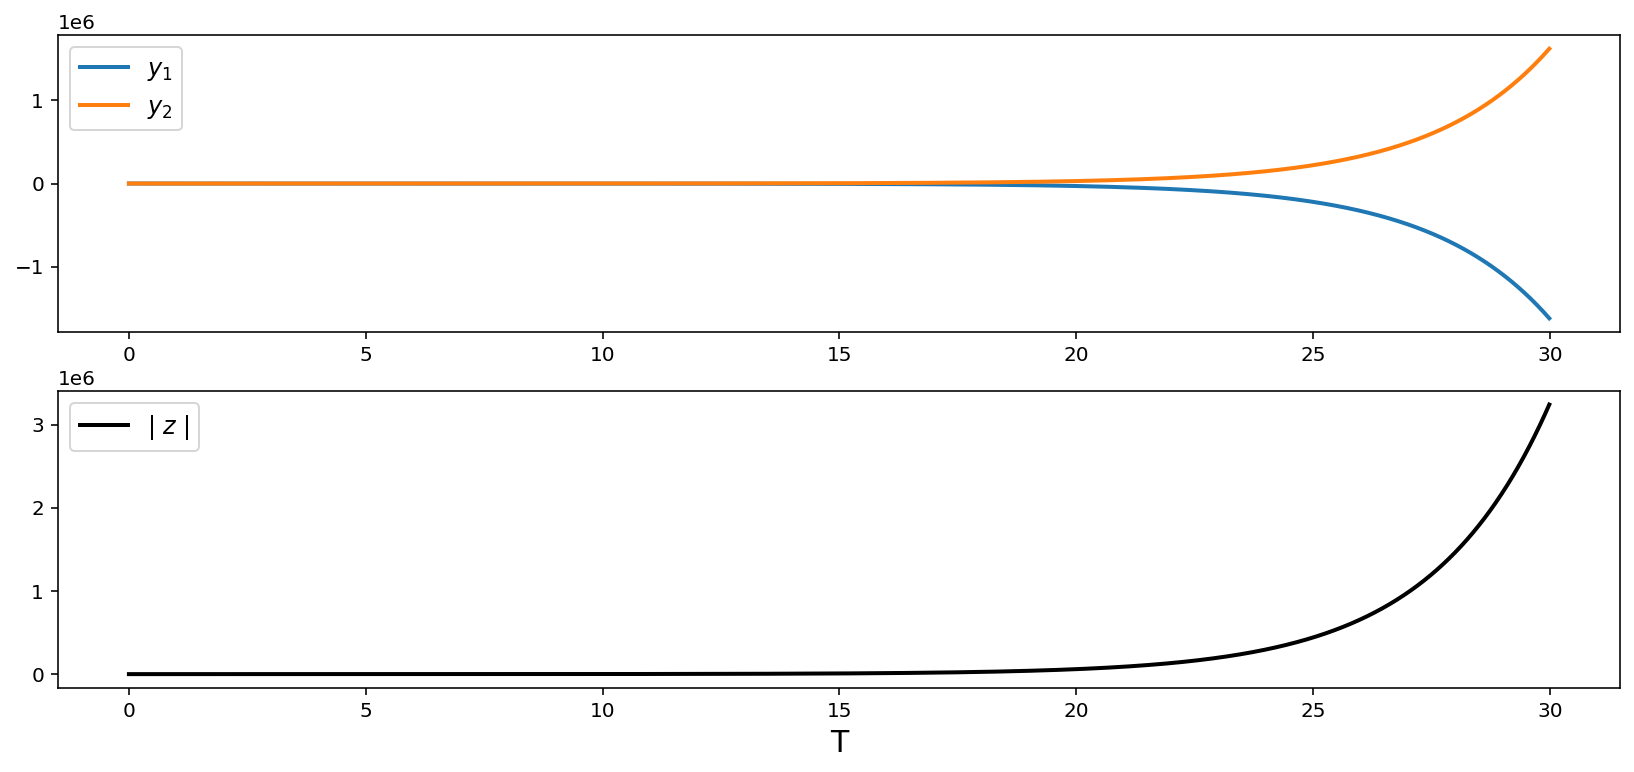

In [6]:
y0 = [-10,10]
t_init, t_final = 0, 30
h = 0.01 
t = np.arange(t_init,t_final,h)

a = 0.4
alpha = 0

X = rk4(coupled_linear_systems, y0, t, a=a, alph=alpha)
z = abs(X[:,0]-X[:,1])
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(t, X,'-',lw=2) 
plt.legend([r'$y_1$',r'$y_2$'], fontsize=12)
plt.subplot(212)
plt.plot(t, z, '-k', lw=2, label='| $z$ |')
plt.xlabel('T', fontsize=15)
plt.legend(fontsize=12)
plt.show()

#### Critical Transition

Plotting 1440 segments
Plotting 1440 segments
Plotting 1440 segments
Plotting 1440 segments


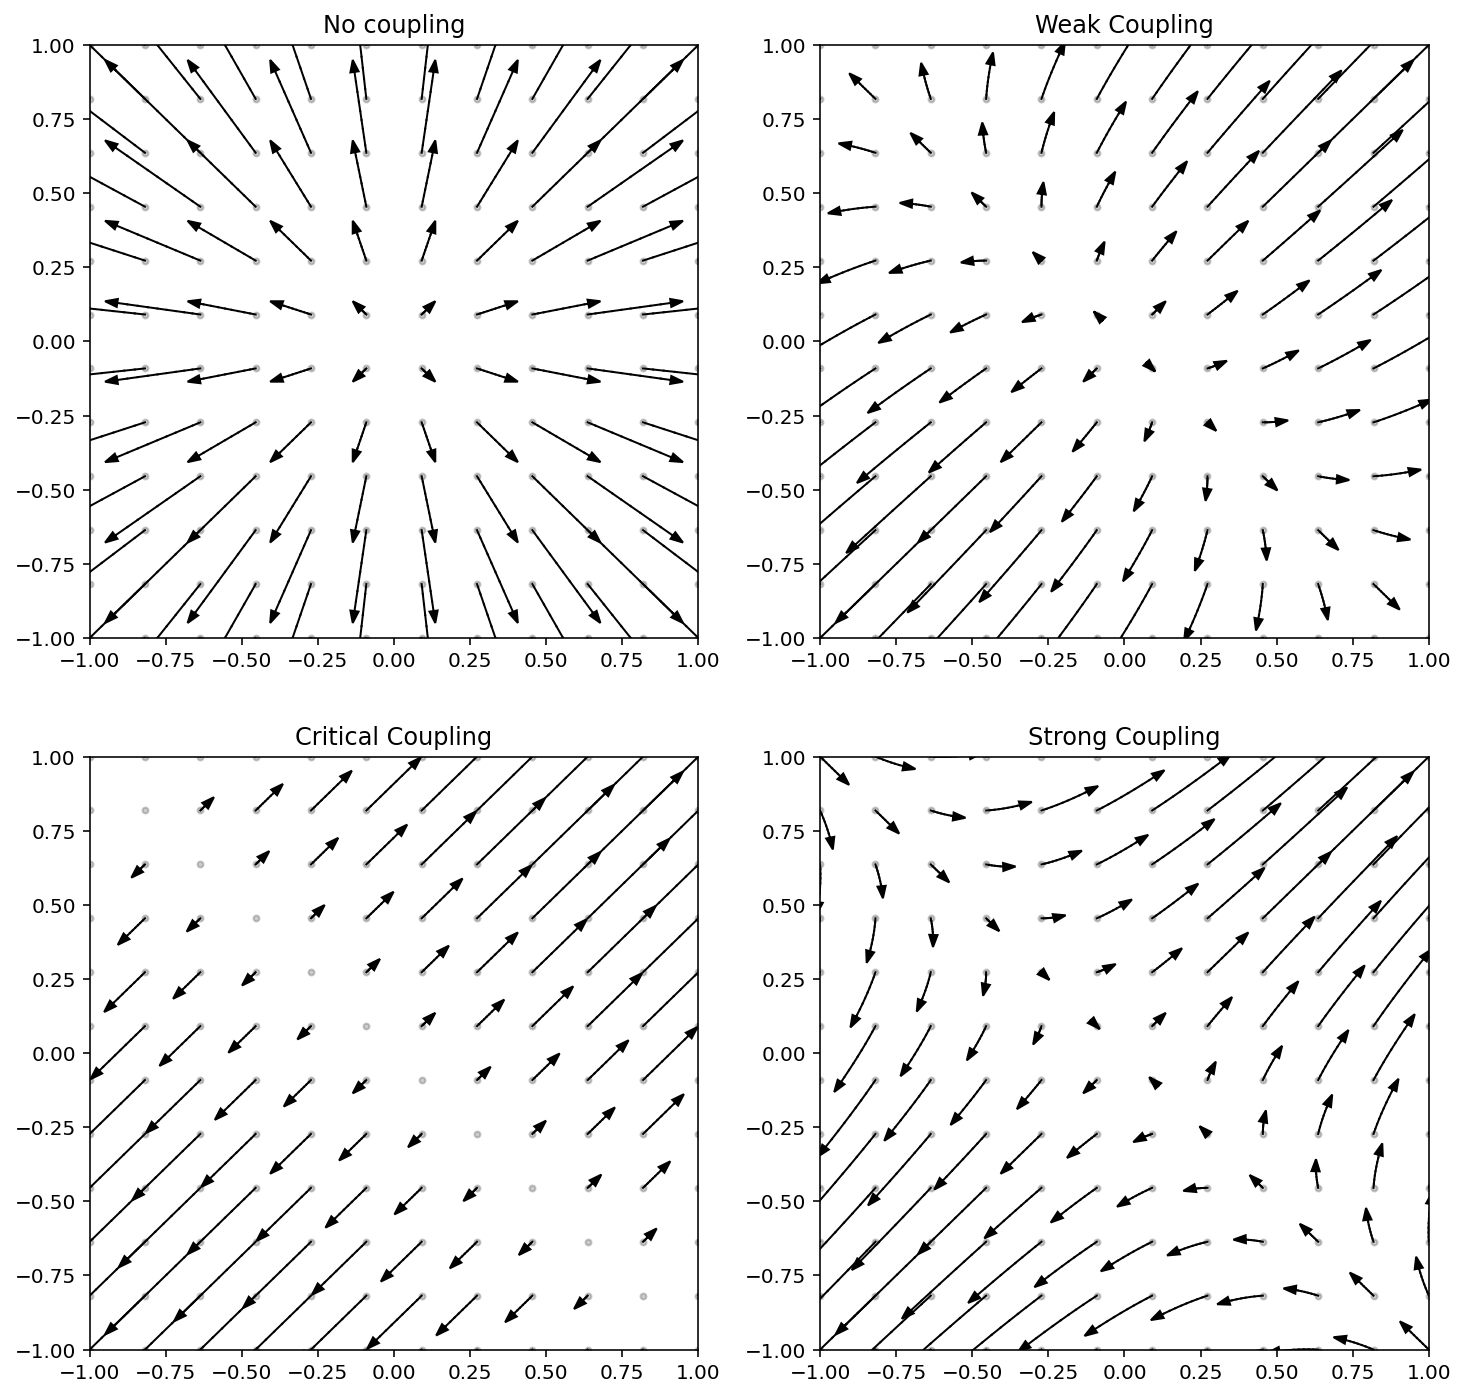

In [7]:
plt.figure(figsize=(12,12))
plotSpace2D(plt.subplot(221, title='No coupling'),coupled_linear_systems, h=0.1, a=0.4, alph=0.00, 
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)
plotSpace2D(plt.subplot(222, title='Weak Coupling'),coupled_linear_systems, h=0.1, a=0.4, alph=0.15,
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)
plotSpace2D(plt.subplot(223, title='Critical Coupling'),coupled_linear_systems, h=0.1, a=0.4, alph=0.20,
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)
plotSpace2D(plt.subplot(224, title='Strong Coupling'),coupled_linear_systems, h=0.1, a=0.4, alph=0.25,
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)
plt.show()

### Non-linear Systems


In [13]:
def system(X, t=0):
    x1dot = -X[1]**3
    x2dot = X[0]**3
    return np.array([x1dot,x2dot]) 

Plotting 43750 segments


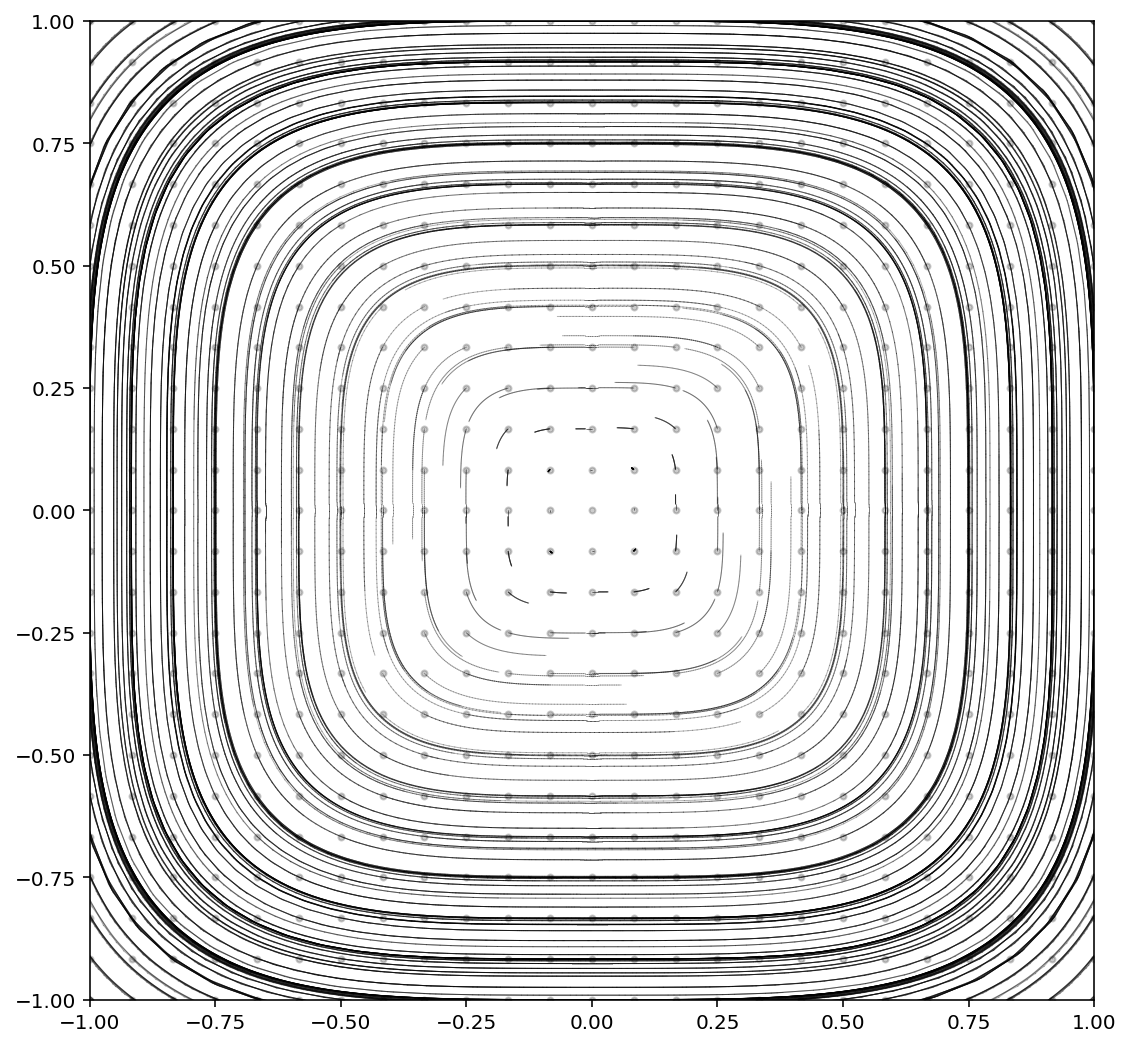

In [9]:
plt.figure(figsize=(9,9))
plotSpace2D(plt.gca(), system, steps=70, kx=25,ky=25, lims=(-1,1,-1,1),
            h=0.1, lw=0.5, alpha=0.3, showinits=True, arrows=0)
plt.show()

#### Lyapunov Function (conservative system)

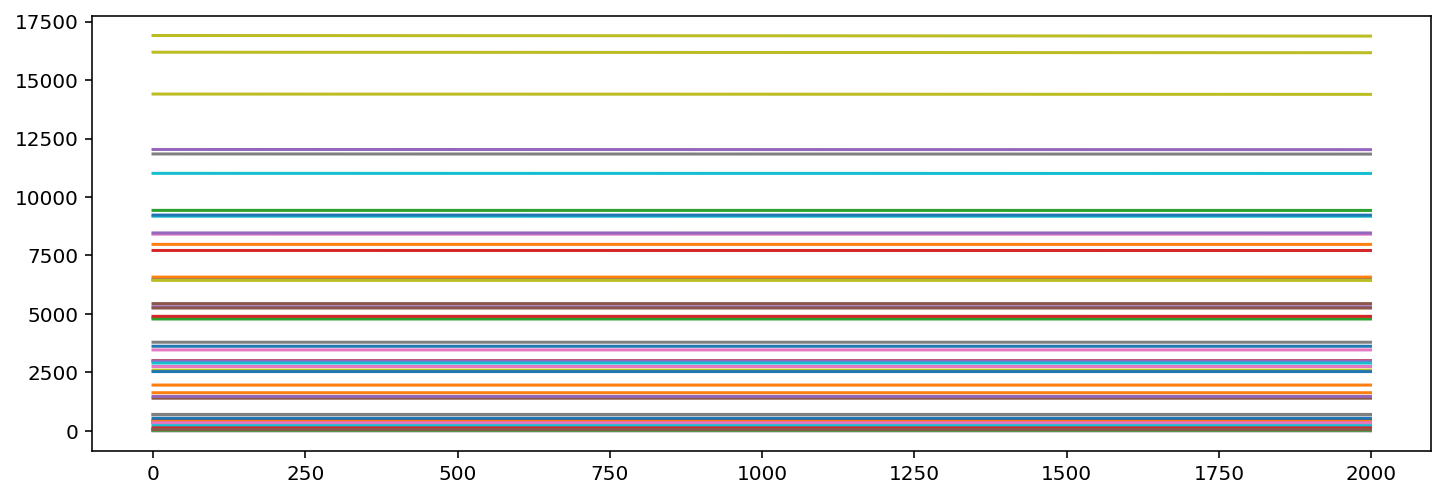

In [16]:
def LF(X): return X[0]**4 + X[1]**4

npoints = 50
Dim = 2
points = [10*np.random.rand(Dim) for k in range(npoints)]
h,steps = 0.001, 2000
X = np.zeros(shape=(steps,Dim))
L = np.zeros(steps)

plt.figure(figsize=(12,4))
for point in points:
    X[0] = point
    L[0] = LF(point)
    for k in range(1,steps):
        X[k] = rk4s(system, h, X[k-1])
        L[k] = LF(X[k])
    plt.plot(L)
plt.show()

# $\mathbb{R}^3$

In [10]:
def system(X, t=0):
    x1dot = -2*X[1] + X[1]*X[2] - X[0]**3
    x2dot = X[0] - X[0]*X[2] - X[1]**3
    x3dot = X[0]*X[1] - X[2]**3
    return np.array([x1dot,x2dot,x3dot]) 

x0 = np.array([1,1,-1])
steps = 10000
h = 0.1
X = np.empty(shape=(3,steps))
X[:,0] = x0
cutoff = steps-1
bound = 1000
for k in range(1,steps):
    X[:,k] = rk4s(system, h=h, x=X[:,k-1])
    if np.any(X[:,k]<-bound) or np.any(X[:,k]>bound):
        cutoff = k-1
        print('Cutoff :',cutoff)
        break
X = X[:,:cutoff]

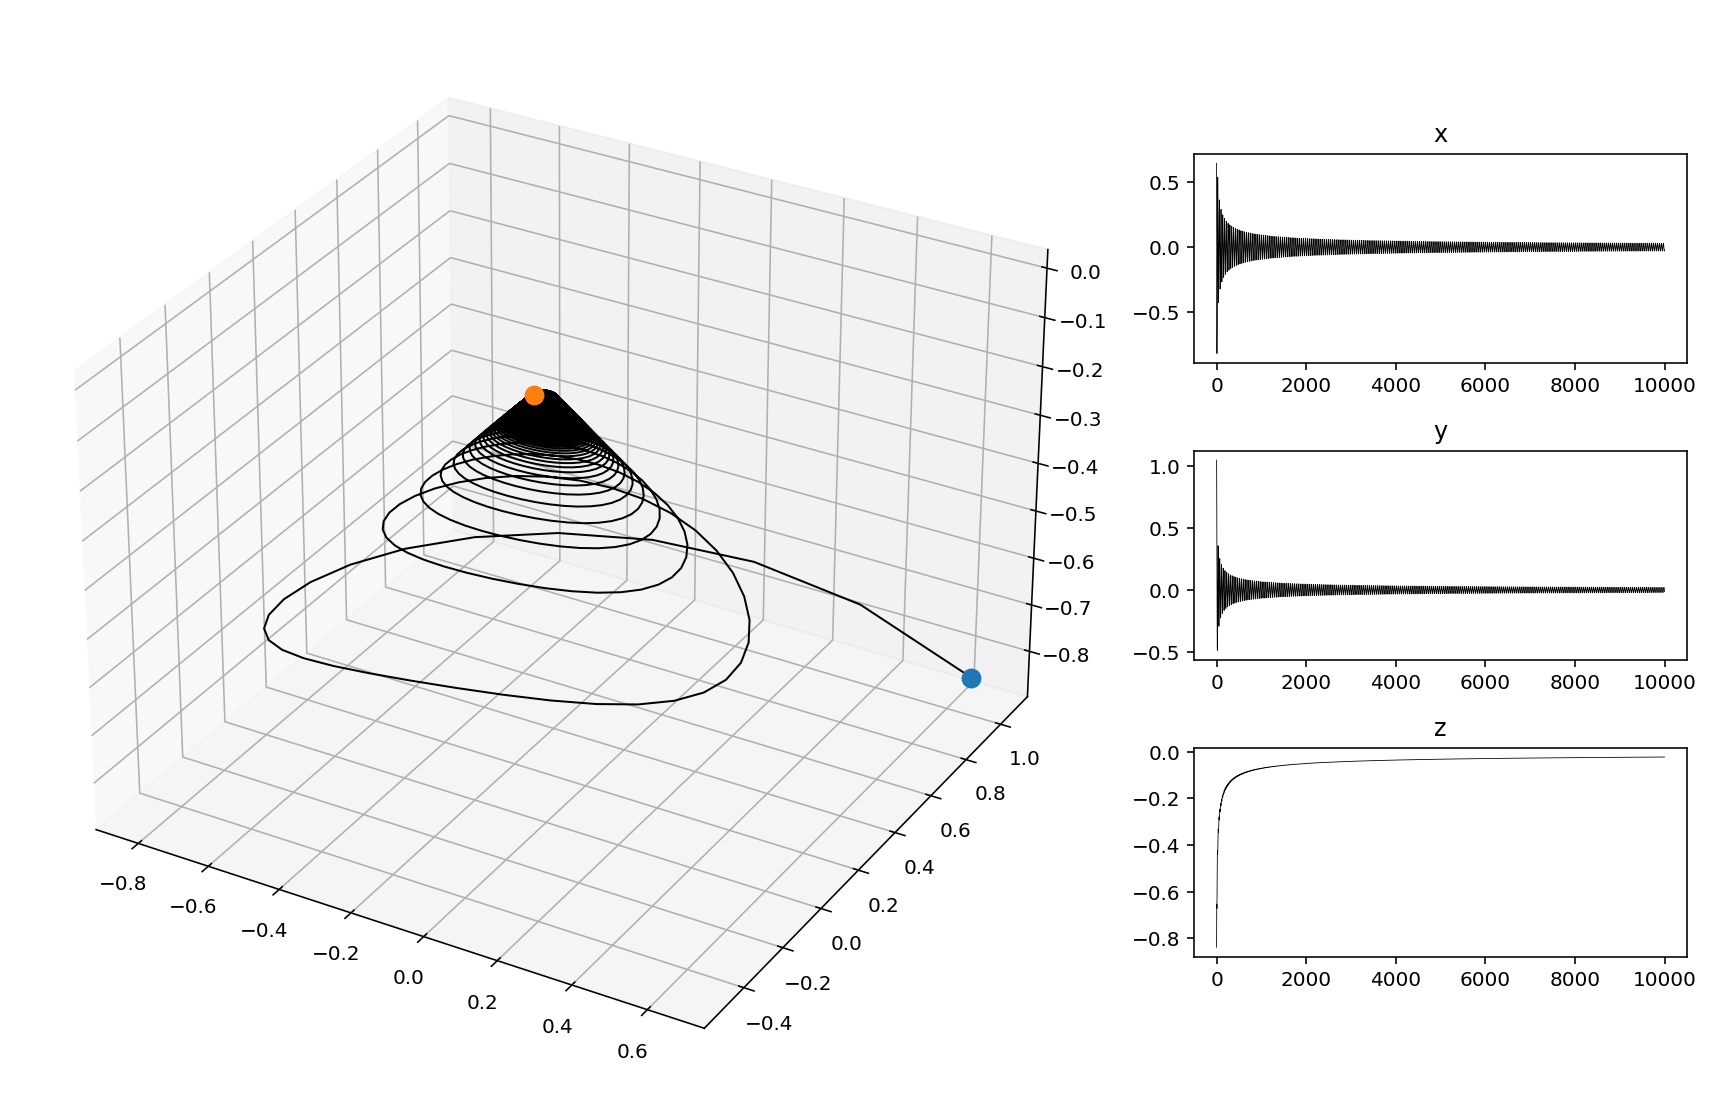

In [11]:
fig = plt.figure(figsize=(12,10))
gs = GridSpec(5, 12, figure=fig)
ax1 = fig.add_subplot(gs[:, :8], projection='3d')
ax1.scatter(X[0,0],X[1,0],X[2,0], 'b', s=80)
ax1.plot(X[0,:],X[1,:],X[2,:],'-k', lw=1, alpha=1) 
ax1.scatter(X[0,-1],X[1,-1],X[2,-1], 'r', s=80)
fig.add_subplot(gs[1, 8:], title='x'); plt.plot(X[0,:],'-k', lw=0.4)
fig.add_subplot(gs[2, 8:], title='y'); plt.plot(X[1,:],'-k', lw=0.4)
fig.add_subplot(gs[3, 8:], title='z'); plt.plot(X[2,:],'-k', lw=0.4)
plt.tight_layout()
plt.show()

#### Lyapunov Function

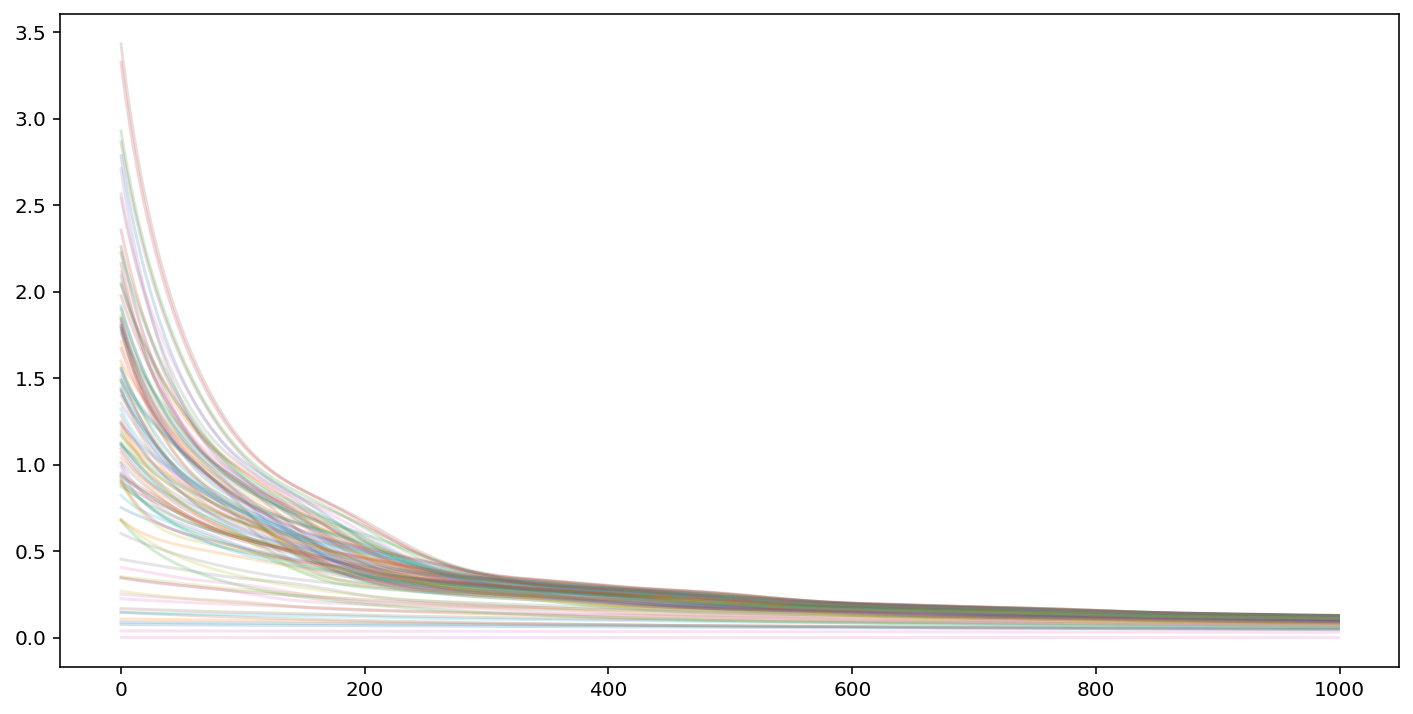

In [244]:
def LF(X): return X[0]**2 + 2*X[1]**2 + X[2]**2

npoints = 100
points = [np.random.rand(3) for k in range(npoints)]
h,steps = 0.01, 1000
X = np.zeros(shape=(steps,3))
L = np.zeros(steps)

plt.figure(figsize=(12,6))
for point in points:
    X[0] = point
    L[0] = LF(point)
    for k in range(1,steps):
        X[k] = rk4s(system, h, X[k-1])
        L[k] = LF(X[k])
    plt.plot(L, alpha=0.2)
plt.show()

In [8]:
def system(X, t=0):
    x1dot = X[0]-X[0]**3
    x2dot = -X[1]
    return np.array([x1dot,x2dot]) 

Plotting 1440 segments


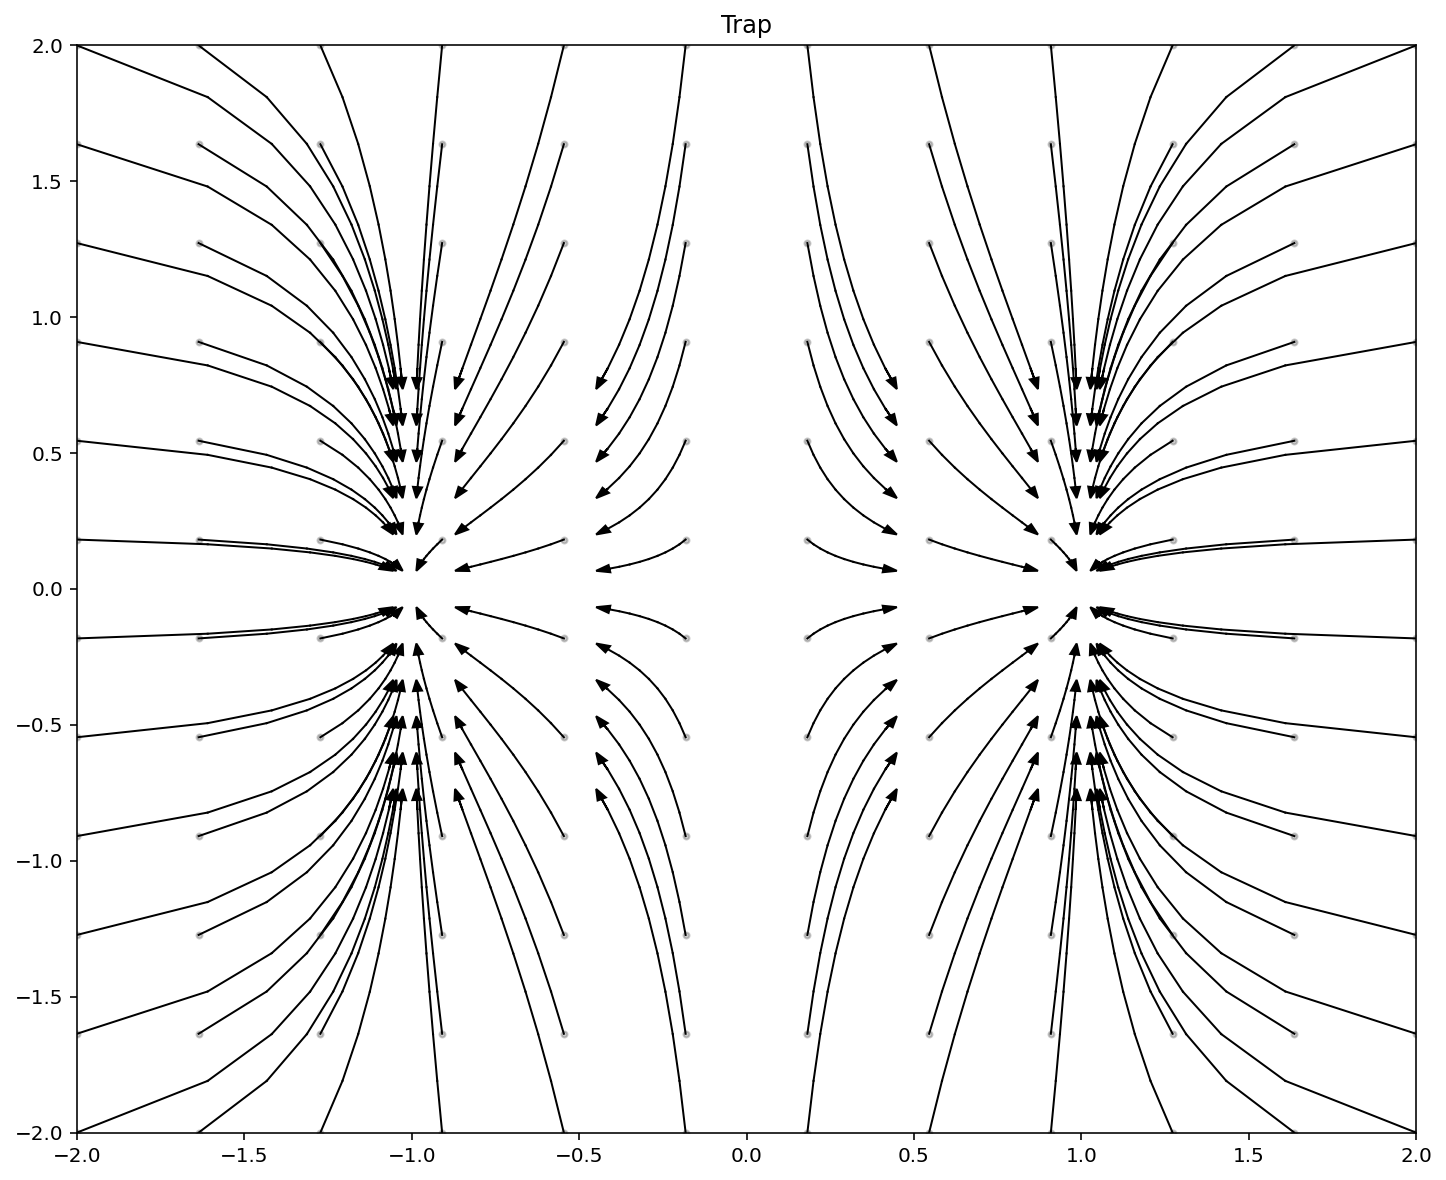

In [13]:
plt.figure(figsize=(12,10))
plotSpace2D(plt.subplot(111, title='Trap'),system, h=0.1, lims=(-2,2,-2,2),
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)